                                       id               dateUtc  \
0    931656cc-7c67-4c1f-af3b-c41cc99fc341  2023-07-03T13:45:00Z   
1    411cd73f-0716-4529-a191-654d669a7850  2023-06-23T13:45:00Z   
2    7c808ba1-cd38-4d61-8e5d-c7cc25ecd6b4  2023-06-01T13:45:00Z   
3    5aab0bbd-106c-44eb-9a9d-b529e4f99813  2023-05-23T13:45:00Z   
4    9dea4c6a-f4d3-4d88-843d-fc1a2df72d56  2023-05-01T13:45:00Z   
..                                    ...                   ...   
264  304c70f5-9d23-4b8c-b715-3252edd2a6e9  2012-07-02T12:58:00Z   
265  2bb7daed-c61f-428f-8ec1-bf1a2e633280  2012-06-21T12:58:00Z   
266  41f12eee-404f-468e-8813-c8311e2342c9  2012-06-01T14:00:00Z   
267  9e9cc998-ead7-4903-8b73-b92f2febf2dd  2012-05-24T13:00:18Z   
268  6e070458-4238-42ee-ac8c-11ee5cb0af94  2012-04-25T13:00:00Z   

            periodDateUtc  actual  revised  consensus  previous  \
0    2023-06-01T00:00:00Z    46.3      NaN       46.3      46.3   
1    2023-06-01T00:00:00Z    46.3      NaN       48.5      48

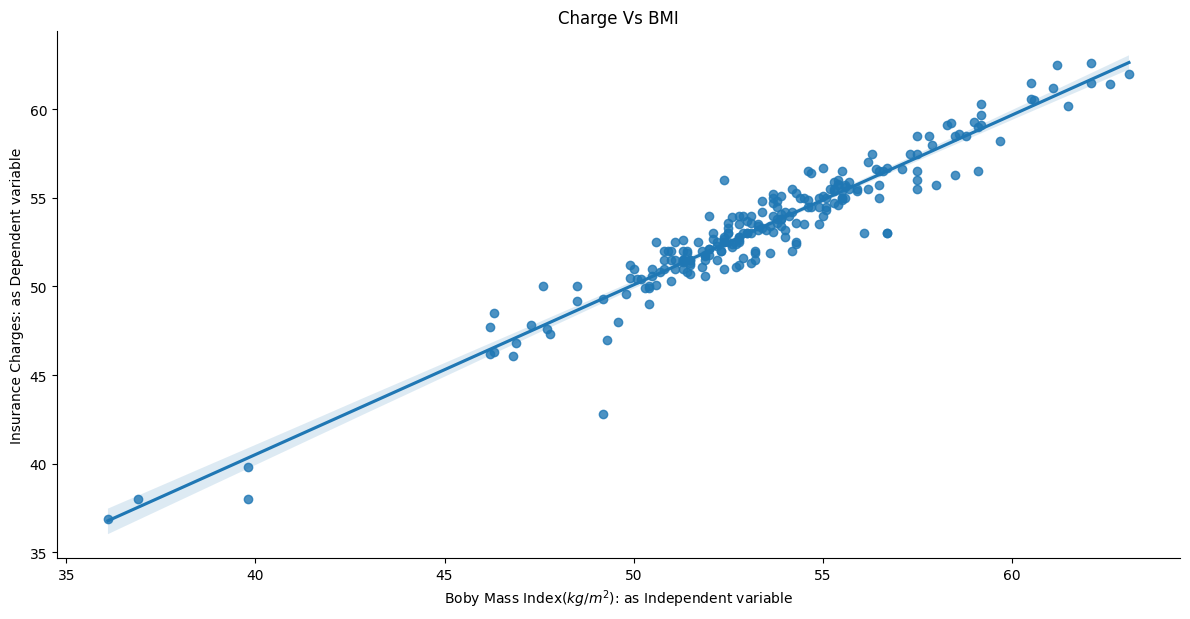

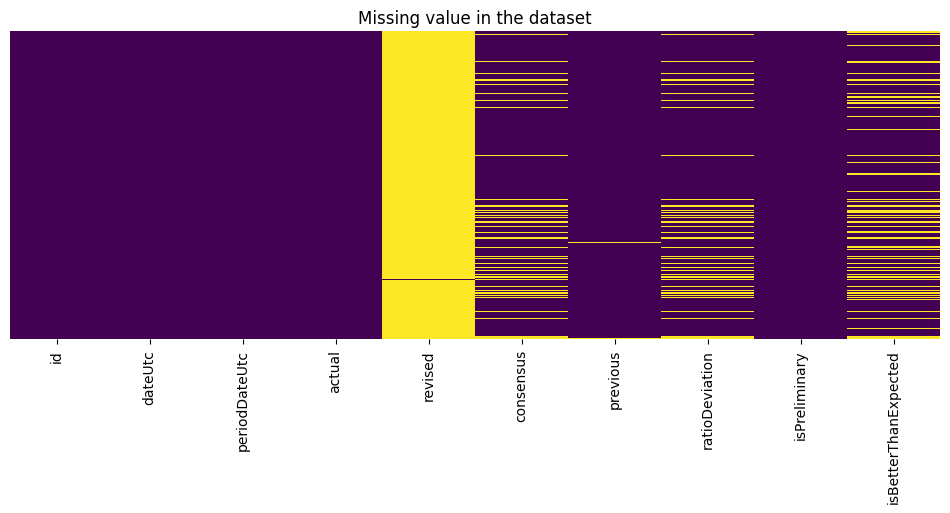

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Read the JSON file into a pandas DataFrame
file_path = './data/USD_Manufacturing_PMI.json'  # Replace with the actual file path of your JSON file
df1 = pd.read_json(file_path);

print(df1)

# Read the JSON file into a pandas DataFrame
file_path = './data/USD_Services_PMI.json'  # Replace with the actual file path of your JSON file
df2 = pd.read_json(file_path);


sns.lmplot(x='actual',y='consensus',data=df1,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');


plt.figure(figsize=(12,4))
sns.heatmap(df1.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

# corr = df1.corr()
# sns.heatmap(corr, cmap = 'Wistia', annot= True);

C:\Users\ACER\AppData\Local\Temp\ipykernel_2988\2981629800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['actual'],bins=50,color='r',ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2988\2981629800.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['actual'],bins=50,color='r',ax=

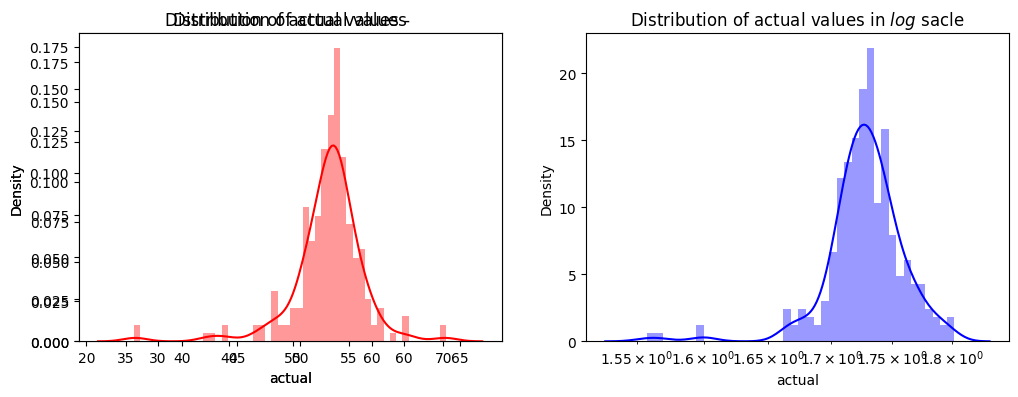

In [37]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df1['actual'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of actual values')

ax=f.add_subplot(121)
sns.distplot(df2['actual'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of actual values - ')

ax=f.add_subplot(122)
sns.distplot(np.log10(df1['actual']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of actual values in $log$ sacle')
ax.set_xscale('log');

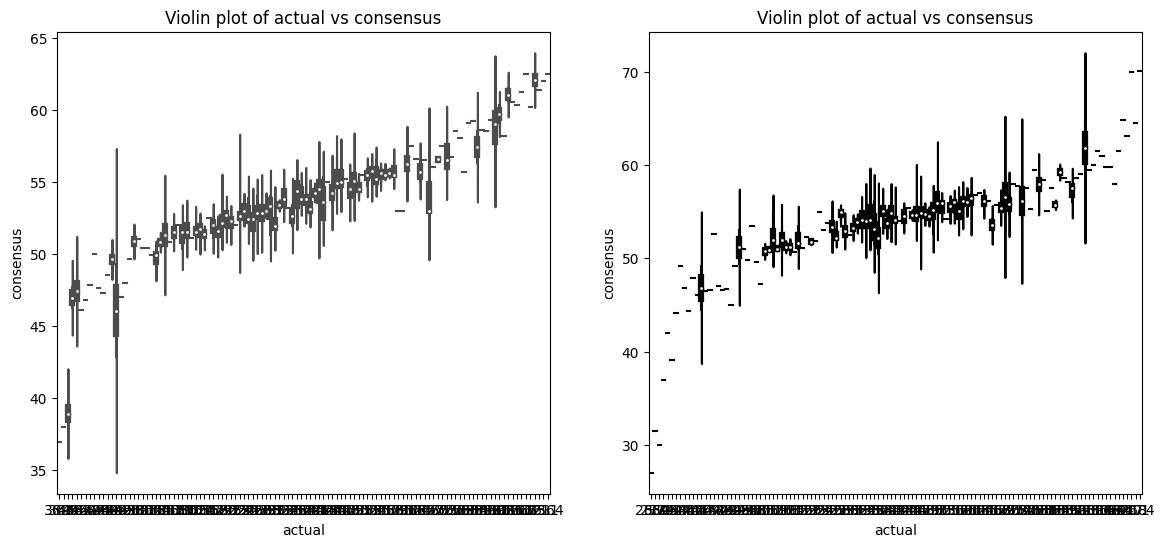

In [31]:

df1['consensus'] = df1['consensus'].fillna(method='ffill')
df1['actual'] = df1['actual'].fillna(method='ffill')

#replacing NaN value of consensus and actual with it's previous value

df2['consensus'] = df2['consensus'].fillna(method='ffill')
df2['actual'] = df2['actual'].fillna(method='ffill')



f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='actual', y='consensus',data=df1,palette='Wistia',ax=ax)
ax.set_title('Violin plot of actual vs consensus')

ax = f.add_subplot(122)
sns.violinplot(x='actual', y='consensus',data=df2,palette='magma',ax=ax)
ax.set_title('Violin plot of actual vs consensus');

In [39]:
#replacing NaN value of consensus and actual with it's previous value

df1['consensus'] = df1['consensus'].fillna(method='ffill')
df1['actual'] = df1['actual'].fillna(method='ffill')



df1['diff'] = df1['actual'] - df1['consensus']


#replacing NaN value of consensus and actual with it's previous value

df2['consensus'] = df2['consensus'].fillna(method='ffill')
df2['actual'] = df2['actual'].fillna(method='ffill')

filtered_df1 = df1[df1['isPreliminary'] != False]
filtered_df2 = df2[df2['isPreliminary'] != False]

# print(filtered_df1.head(4));

sns.lmplot(x='bmi',y='charges',data=df1,aspect=2,height=6)

plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

KeyError: "None of [Index(['bmi', 'charges'], dtype='object')] are in the [columns]"

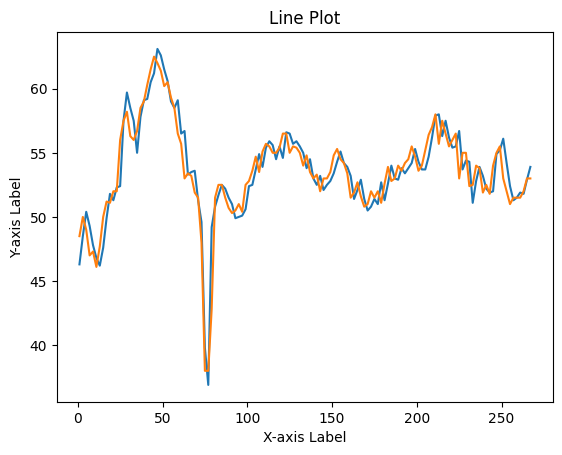

In [33]:

plt.plot(filtered_df1.index, filtered_df1['actual'], label='USD_Manufacturing_PMI')
plt.plot(filtered_df1.index, filtered_df1['consensus'], label='USD_Manufacturing_PMI')
# plt.plot(df1.index, df1['consensus'], label='Consensus')

# plt.plot(filtered_df2.index, filtered_df2['actual'], label='Actual')
# plt.plot(df2.index, df2['consensus'], label='Consensus')


#plt.plot(df.index, df['diff'], label='Consensus')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()